In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as st
from scipy.stats import multivariate_normal
from scipy import optimize
from scipy.signal import argrelextrema
from math import *

import sys

import matplotlib
from matplotlib.ticker import MaxNLocator

from numpy.random import randn, shuffle
from scipy import linspace, meshgrid, arange, empty, concatenate, newaxis, shape

In [2]:
def f(x, y):
    return ((x-2)*(x-2)) + (((x-3)*(x-3)))

In [3]:
def f2(x, y):
    return pow((4-y), 2) + 20*pow(((x+3) - pow((y-3),2)), 2)
    #return (1-(y-3))**2 + 20(((x+3) - (y-3)**2)**2)

In [4]:
def dfdx(x, y):
    return 2*(x-2)

In [5]:
def dfdy(x,y):
    return 2*(y-3)

In [6]:
def df2dx(x, y):
    #return 40*((x+3) - pow((y-3),2))
    return 40*(x+6*y-pow(y,2)-6)

In [7]:
def df2dy(x,y):
    #return (80*((x+3) - pow((y-3),2))*(y-3)) - (2*(4-y))
    return (80*(x+6*y-pow(y,2)-6)) - (2*(4-y))

In [8]:
def gd(arr, alpha):
    return arr - alpha*np.array([dfdx(arr[0],arr[1]), dfdy(arr[0],arr[1])])

In [9]:
def gd2(arr, alpha):
    return arr - alpha*np.array([df2dx(arr[0],arr[1]), df2dy(arr[0],arr[1])])

In [10]:
np.array([1, 3]) - 0.5*np.array([2, 2])

array([0., 2.])

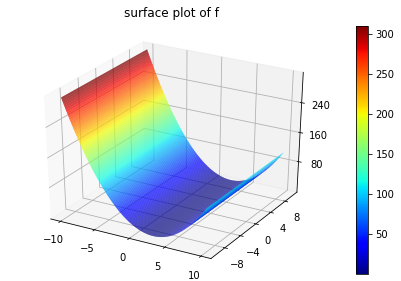

In [11]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)

X, Y = meshgrid(x, y)
Z = f(X,Y)


# ======================================
## reference picture (X, Y and Z in 2D):

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

title = ax.set_title("surface plot of f")
title.set_y(1.01)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))

fig.tight_layout()


[[71141856.  71104141.  71066436.  ... 65343061.  65306916.  65270781. ]
 [67953303.5 67916443.5 67879593.5 ... 62288743.5 62253453.5 62218173.5]
 [64873869.  64837854.  64801849.  ... 59341974.  59307529.  59273094. ]
 ...
 [33658341.5 33632401.5 33606471.5 ... 29708221.5 29683851.5 29659491.5]
 [35539005.  35512350.  35485705.  ... 31476630.  31451545.  31426470. ]
 [37498171.5 37470791.5 37443421.5 ... 33321971.5 33296161.5 33270361.5]]


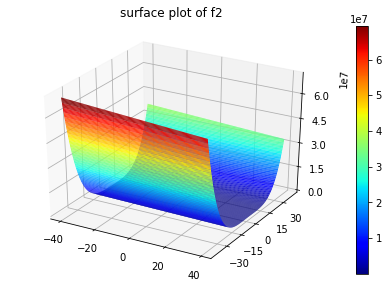

In [12]:
x = np.arange(-40, 40, 0.5)
y = np.arange(-40, 40, 0.5)

X, Y = meshgrid(x, y)
vf2 = np.vectorize(f2)
Z = vf2(X,Y)
print(Z)


# ======================================
## reference picture (X, Y and Z in 2D):

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

title = ax.set_title("surface plot of f2")
title.set_y(1.01)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))

fig.tight_layout()


In [13]:
# f function gradient descent

arr = np.array([0, 0])
new_arr = arr
threshold = 0.001
alpha = [0.5]
max_iter = 10
plot_arr = []
plot_val = []

for i in range(len(alpha)):
    counter = 0
    print("Learning rate: ", alpha[i])
    tmp_arr = []
    tmp_val = []
    while (1):
        counter += 1
        tmp_arr.append(new_arr)
        tmp_val.append(f(new_arr[0], new_arr[1]))
        new_arr = gd(arr,alpha[i])
        #print("iteration: ",counter ," current min: ", new_arr)
        if (counter >= max_iter):
            print("iterations: ",counter ," min: ", new_arr)
            plot_arr.append(tmp_arr)
            plot_val.append(tmp_val)
            break
        arr = new_arr

Learning rate:  0.5
iterations:  10  min:  [2. 3.]


In [14]:
f(2,3)

1

In [15]:
# f2 gradient descent

arr = np.array([0, 0])
new_arr = arr
alpha = [0.5]
max_iter = 100
plot_arr2 = []
plot_val2 = []

for i in range(len(alpha)):
    counter = 0
    print("Learning rate: ", alpha[i])
    tmp_arr = []
    tmp_val = []
    while (1):
        counter += 1
        tmp_arr.append(new_arr)
        #print(new_arr[0])
        #print(new_arr[1])
        tmp_val.append(f2(new_arr[0], new_arr[1]))
        new_arr = gd2(arr,alpha[i])
        #print("iteration: ",counter ," current min: ", new_arr)
        if (counter >= max_iter):
            print("iterations: ",counter ," min: ", new_arr)
            plot_arr2.append(tmp_arr)
            plot_val2.append(tmp_val)
            break
        arr = new_arr

Learning rate:  0.5


OverflowError: math range error

In [16]:
tmp_val

[736.0,
 67182652880.0,
 5.777288894728433e+26,
 4.2722645725634986e+58,
 2.336287305981588e+122,
 6.986545121396105e+249]

In [17]:
arr = np.array([0, 0])
new_arr = arr
alpha = [0.0001]
max_iter = 100
plot_arr2 = []
plot_val2 = []

for i in range(len(alpha)):
    counter = 0
    print("Learning rate: ", alpha[i])
    tmp_arr = []
    tmp_val = []
    while (1):
        counter += 1
        tmp_arr.append(new_arr)
        #print(new_arr[0])
        #print(new_arr[1])
        tmp_val.append(f2(new_arr[0], new_arr[1]))
        new_arr = gd2(arr,alpha[i])
        #print("iteration: ",counter ," current min: ", new_arr)
        if (counter >= max_iter):
            print("iterations: ",counter ," min: ", new_arr)
            plot_arr2.append(tmp_arr)
            plot_val2.append(tmp_val)
            break
        arr = new_arr

Learning rate:  0.0001
iterations:  100  min:  [0.52268091 1.10840782]


In [18]:
f2(new_arr[0], new_arr[1])

8.422777358620449

In [19]:
beta_current = np.array([0, 0])
beta_next = beta_current

y_current = beta_current
t_current = 1.0

# history
beta_history = []
max_iterations = 10
eta = 0.5

for k in range(int(max_iterations)):
    # history
    beta_history.append(beta_current)

    # gradient update
    t_next = .5*(1 + np.sqrt(1 + 4*t_current**2))
    beta_next = y_current - eta* np.array([dfdx(y_current[0],y_current[1]), dfdy(y_current[0],y_current[1])])
    y_next = beta_next + (t_current - 1.0)/(t_next)*(beta_next - beta_current)
    beta_current = beta_next
    y_current = y_next
    t_current = t_next

print('accelerated GD finished after ' + str(k) + ' iterations')

#return {'solution': beta_current,
#        'beta_history': beta_history}

accelerated GD finished after 9 iterations


In [20]:
beta_current

array([2., 3.])

In [21]:
f(beta_current[0], beta_current[1])

1.0

In [22]:
# Nesterov's accelerated gradient descent - f2
beta_current = np.array([0, 0])
beta_next = beta_current

y_current = beta_current
t_current = 1.0

# history
beta_history = []
max_iterations = 100
eta = 0.001

for k in range(int(max_iterations)):
    # history
    beta_history.append(beta_current)

    # gradient update
    t_next = .5*(1 + np.sqrt(1 + 4*t_current**2))
    beta_next = y_current - eta* np.array([df2dx(y_current[0],y_current[1]), df2dy(y_current[0],y_current[1])])
    y_next = beta_next + (t_current - 1.0)/(t_next)*(beta_next - beta_current)

    beta_current = beta_next
    y_current = y_next
    t_current = t_next

print('accelerated GD finished after ' + str(k) + ' iterations')

#return {'solution': beta_current,
#        'beta_history': beta_history}

accelerated GD finished after 99 iterations


In [23]:
beta_current

array([-2.31541106,  2.190372  ])

In [24]:
f2(beta_current[0], beta_current[1])

3.2916797367348396